# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [1]:
# Import the titanic dataset here
import numpy as np
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [6]:
#to simplify the class variable
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"
})

#to filter out crew
df_passengers = df_titanic[(df_titanic["type"] == "passenger")]

#joint distribution between class and where passengers embarked (doesn't involve normalizing)
pd.crosstab(df_passengers["class"], df_titanic["embarked"])

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [8]:
#conditional distribution of passenger class given where they embarked
pd.crosstab(df_passengers["class"], df_titanic["embarked"], normalize='columns')

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


In [9]:
#conditional distribution of where passengers embarked given their class
pd.crosstab(df_passengers["class"], df_titanic["embarked"], normalize='index')

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


54.0481% of 3rd class passengers embarked at Southampton.

69.6757% of passengers that embarked at Southampton that were 3rd class passengers.

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 17'. Pick better value with 'binwidth'.


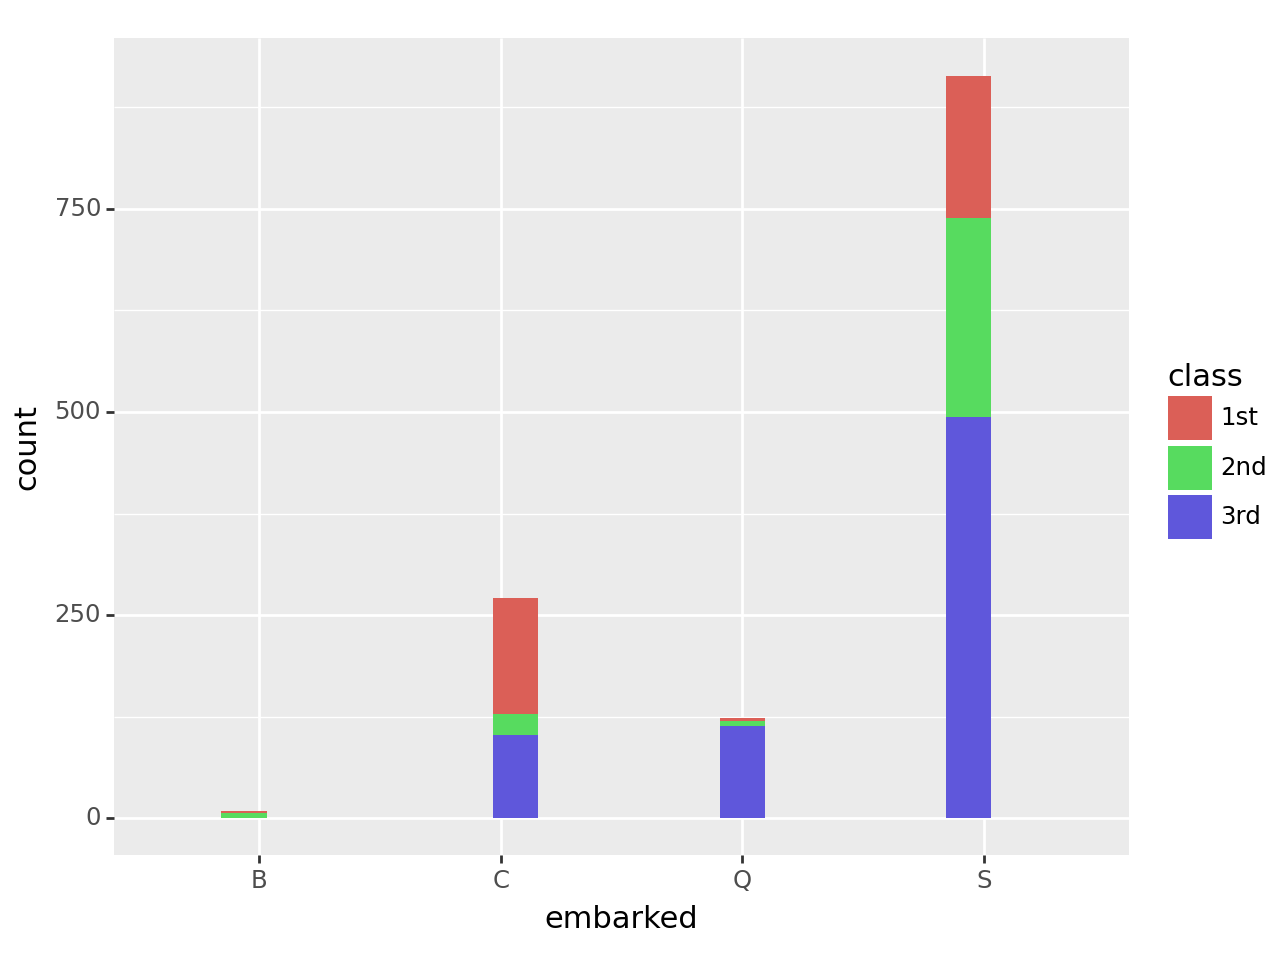

<Figure Size: (640 x 480)>

In [17]:
import plotnine as p9
from plotnine import ggplot
(p9.ggplot(df_passengers,
p9.aes(
  x = "embarked",
  fill = "class"
))
+ p9.geom_histogram()
)

Pros of using this bar plot:

*   Besides the Birmingham bar, viewers can easily see the distribution of class given where passengers embarked. Addressing the question, what proportion of 3rd class passengers embarked at Southampton, viewers can easily see that the proportion is at least 50%. This graph is a decent insight for the proportions of class given city embarked.
*   In addtition, the difference of how many passengers embarked at each city is clearly visible.

Cons of using this bar plot:

*   For Birmingham, viewers cannot see the proportions well. We see mostly green for 2nd class which is what we should expect to be seeing but it not as clear as information portrayed in the other bars. This issue with visualization is due to the large difference between counts amongst embarked cities (i.e. there are way more passengers that embarked at Southampton compared to Birmingham).


